# 1. Import Libraries and Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("CleanedSets.csv")
playerdf = pd.read_csv("CleanedDetails.csv")

In [3]:
df.head()

,Player1,Player2,Winner,Score,Loser,MatchNo,EUAC,Date,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
0,Alumento,Owdy,Alumento,2-0,Owdy,1,1,2017-10-21,11,7,22,17,1
1,BambooBoss,FrankTank,FrankTank,2-0,BambooBoss,2,1,2017-10-21,14,13,19,5,1
2,Kotorious BRD,Altair,Kotorious BRD,0--1,Altair,3,1,2017-10-21,15,13,18,17,1
3,RD | | Dushni,Raffa_,Raffa_,2-0,RD | | Dushni,4,1,2017-10-21,12,17,21,4,1
4,InkA_,D2S_Maxou,InkA_,2-1,D2S_Maxou,5,1,2017-10-21,13,9,20,1,1


In [4]:
playerdf.head()

,Start ID,Challonge ID,Player_Map,Player
0,0,164493,2ednar,2ednar
1,0,2992428,AU_Leenykins,AU_Leenykins
2,0,2942327,Alfon42,Alfon42
3,0,4324849,Alistair__,Alistair13
4,0,5390120,Alistair__,Alistair__


# 2. EDA

## 2.1 Tournament information

In [ ]:
date1 = df[["Date"], 

### 2.1.1 How many Tournaments have there been? 

In [14]:
df["Tournament No"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111], dtype=int64)

There have been 111 EUACs

In [15]:
df["MatchNo"].mean()

11.574302697759489

Average EUAC has ~11.6 matches 

## 2.1 Most Common Score

In [5]:
df["Score"].unique()

array(['2-0', '0--1', '2-1', '3-1', '3-0', '3-2'], dtype=object)

In [6]:
values = df["Score"].value_counts()
values

2-0     1195
2-1      508
3-1      144
3-0      135
3-2      122
0--1      83
Name: Score, dtype: int64

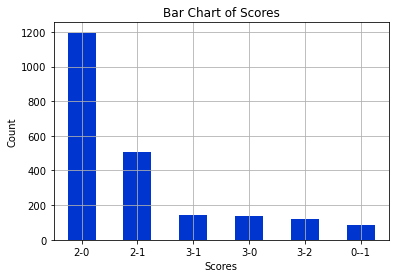

In [7]:
values.plot(kind="bar", color="#0035d0", grid=True)
plt.xlabel("Scores")
plt.ylabel("Count")
plt.xticks(rotation="0")
plt.title("Bar Chart of Scores")
plt.show()

Most common score is a 2-0. Out numbering the next highest, 2-1, by double <br>
"Finals" are less common but they are roughly the same. But 3-2 is the lowest indicating that Finals are not generally all that even 

## 2.2 Correlations

In [8]:
heat = df.corr()

In [9]:
heat

,MatchNo,P1 Seed,P1 Placement,P2 Seed,P2 Placement,Tournament No
MatchNo,1.000000,-0.027995,-0.169150,-0.211780,-0.341174,-0.276771
P1 Seed,-0.027995,1.000000,0.700772,0.441375,0.446473,-0.244598
P1 Placement,-0.169150,0.700772,1.000000,0.527211,0.471855,-0.223788
P2 Seed,-0.211780,0.441375,0.527211,1.000000,0.754884,-0.314577
P2 Placement,-0.341174,0.446473,0.471855,0.754884,1.000000,-0.211962
Tournament No,-0.276771,-0.244598,-0.223788,-0.314577,-0.211962,1.000000


<AxesSubplot:>

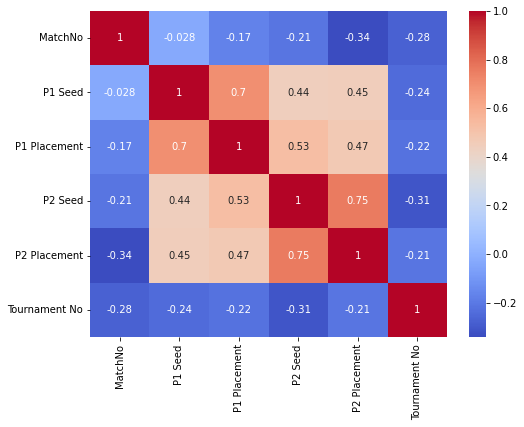

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data=heat, annot=True, cmap="coolwarm")

High correlation between a player's seeding and their placement (0.7 for Player 1 and 0.75 for Player 2). <br>
Suggesting that player's are usually seeded appropriately

## Who are the strongest players?

###  Each player who has won an EUAC

In [11]:
# Add players to a set that have had a placement of 1. Sets don't contain duplicates
players = set()
for i in playerdf["Player_Map"]:
    for a,b,c,d in zip(df["Player1"], df["Player2"], df["P1 Placement"], df["P2 Placement"]):
        if i == a:
            if c == 1:
                players.add(i)
                continue
            else:
                continue
        if i == b:
            if d == 1:
                players.add(i)
                continue
            else:
                continue

In [12]:
players

{'Alistair__',
 'D2S_Maxou',
 'Frank001',
 'Grimwood96',
 'Iceman92',
 'JrARMS',
 'Raffa_',
 'Ripha',
 'Shedy',
 'Yamber',
 'Yätta',
 'replicant___'}

12 Players have won at least one EUAC throughout its run